## Read data

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pywedge as pw
import bqplot

In [2]:
df = pd.read_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\FraudDetectionData.csv")

In [3]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


## Missing values

In [4]:
 df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## Check for any duplicated entries

In [51]:
# check for duplicate rows
duplicates = df.duplicated()
print(duplicates)

# subset DataFrame to show only duplicate rows
duplicates_df = df[duplicates]
print(duplicates_df)

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Length: 6362620, dtype: bool
Empty DataFrame
Columns: [step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud]
Index: []


## Check for class imbalance in target variable

In [5]:
df.isFraud.value_counts(normalize=True)

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

## Graph for class imbalance

Text(0.5, 1.0, 'Count of Fraudulent & Non-Fraudulent Transactions')

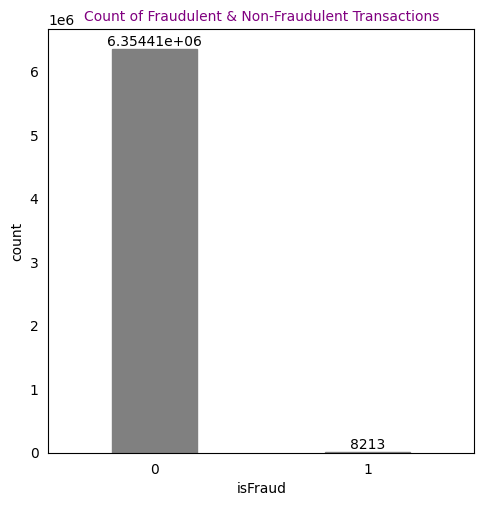

In [21]:
from tkinter import font
counts = df['isFraud'].value_counts().rename_axis('isFraud').reset_index(name='count')
fig = plt.figure(figsize=(5.5, 5.5))
ax = sns.barplot(x='isFraud', y='count', data=counts,color='gray', edgecolor ="gray")

# Define Function in which we will pass new width
def Width(ax, new_width) :
    for patch in ax.patches :
        current_width = patch.get_width()
        difference = current_width - new_width
        # Set new width
        patch.set_width(new_width)
        # Now Recenter the Bars
        patch.set_x(patch.get_x() + difference * .5)
        ax.tick_params(bottom=False,left=False)
        
#Adjust width to 0.4
Width(ax, 0.4)
ax.bar_label(ax.containers[0])
plt.title('Count of Fraudulent & Non-Fraudulent Transactions',fontsize =10,color='purple')

In [22]:
# count the number of times 0 and 1 appear in the isFraud column
counts = df['isFraud'].value_counts()

print(counts)

0    6354407
1       8213
Name: isFraud, dtype: int64


## Feature encoding

In [5]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of label Encoder
le = LabelEncoder()

# Using .fit_transform function to fit label and return encoded label
label = le.fit_transform(df['type'])

# removing the column 'type' from df as it is of no use now.
df.drop("type", axis=1, inplace=True)

# Appending the array to our dataFrame with column name 'type'
df["type"] = label

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['nameDest'])
label
df.drop("nameDest", axis=1, inplace=True)
df["nameDest"] = label

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['nameOrig'])
label
df.drop("nameOrig", axis=1, inplace=True)
df["nameOrig"] = label

In [8]:
print(skewness(df.nameOrig))

NameError: name 'skewness' is not defined

## Correlated features

<AxesSubplot:>

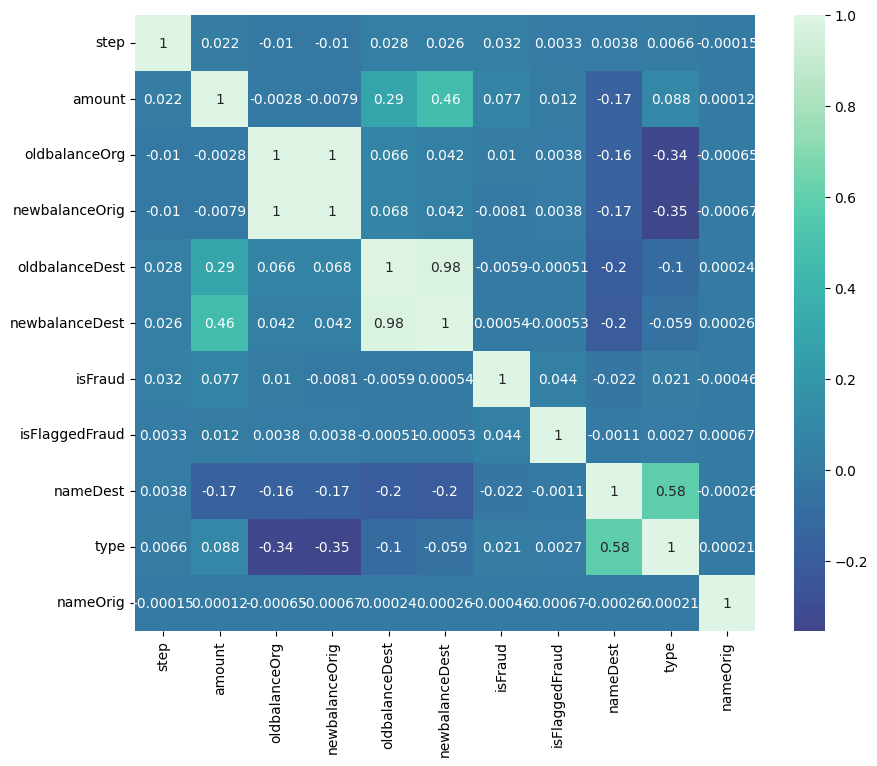

In [43]:
import pandas as pd
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df.corr(method='pearson')
plt.figure(figsize=(10,8)) # Resize
# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap='mako', center=0, annot=True)

<AxesSubplot:>

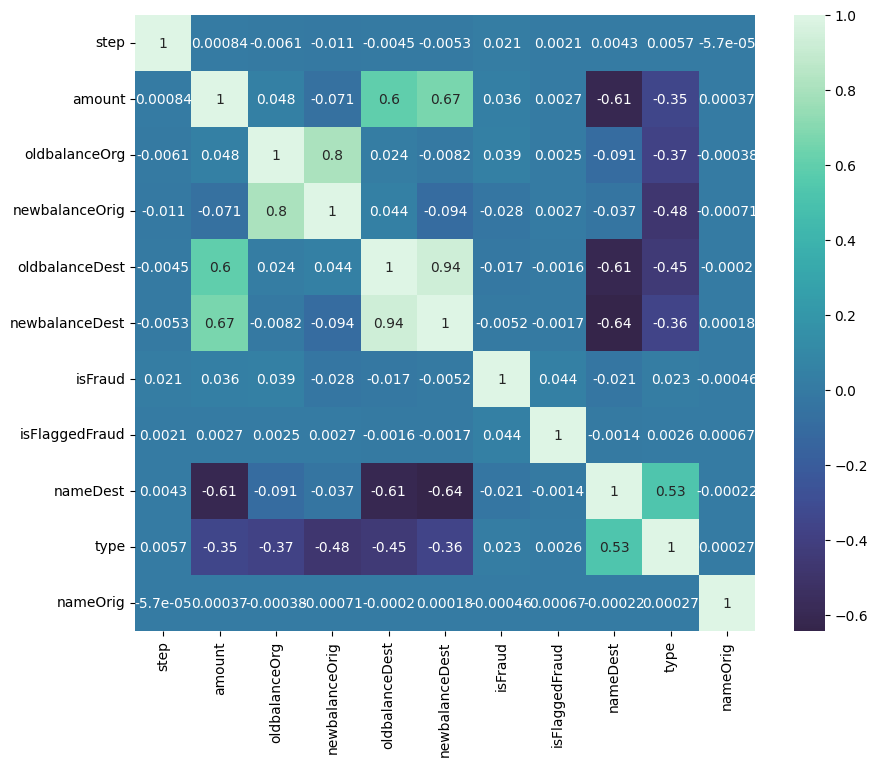

In [42]:
import pandas as pd
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df.corr(method='spearman')
plt.figure(figsize=(10,8)) # Resize
# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap='mako', center=0, annot=True)

## Transactions

In [14]:
#Create New DataFrame with Count
new_df = df["type"].value_counts().rename_axis('types_of_transaction').reset_index(name='counts')
new_df.head()

,types_of_transaction,counts
0,1,2237500
1,3,2151495
2,0,1399284
3,4,532909
4,2,41432


In [15]:
#Set lables and values
my_labels = new_df.types_of_transaction
my_values = new_df.counts

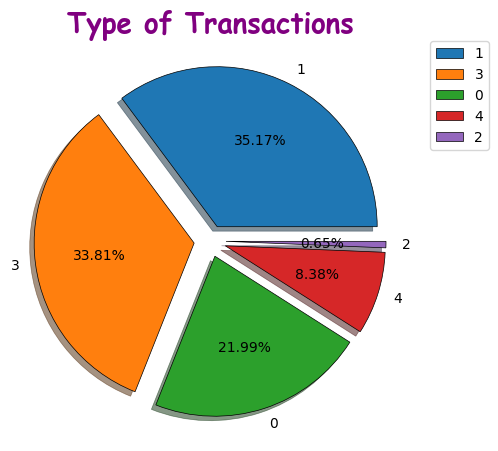

In [16]:
#Visualize the pie chart
fig=plt.figure(figsize=(4,4)) # Resize
wp= {'linewidth':0.5,'edgecolor':"black"}
ax=fig.add_axes([0,0,1,1]) # Add axis to the figure
ax.axis('equal')
explode=(0.1,0.1,0.1,0.1,0.1)
ax.pie(my_values, labels=my_labels, autopct='%1.2f%%',explode=explode,shadow=True,wedgeprops=wp)
font = {'fontname':'Comic Sans MS'} # Change font
plt.title('Type of Transactions',fontsize=20,color='purple',**font,fontweight='bold')
plt.legend(['CASH_OUT', 'PAYMENT', 'CASH_IN','TRANSFER','DEBIT'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()